In [1]:
# Artificial Intelligence for Business
# Maximizing the Revenues of an Online Retail Business with Thompson Sampling
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt 
import random

In [2]:
# Setting the parameters
N = 10000 
d=9

In [3]:
# Creating the simulation
# conversion_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01] 
X = np.array(np.zeros([N,d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

In [4]:
# Implementing a Random Strategy and Thompson Sampling
strategies_selected_rs = [] 
strategies_selected_ts = [] 
total_reward_rs = 0 
total_reward_ts = 0 
numbers_of_rewards_1 = [0] * d 
numbers_of_rewards_0 = [0] * d 
for n in range(0, N):
    # Random Strategy
    strategy_rs = random.randrange(d) 
    strategies_selected_rs.append(strategy_rs) 
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs 
    # Thompson Sampling
    strategy_ts = 0 
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1,
                                         numbers_of_rewards_0[i] + 1)
        if random_beta > max_random: 
            max_random = random_beta 
            strategy_ts = i
    reward_ts = X[n, strategy_ts] 
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1 
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts

In [5]:
# Computing the Relative Return
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100 
print("Relative Return: {:.0f} %".format(relative_return))

Relative Return: 100 %


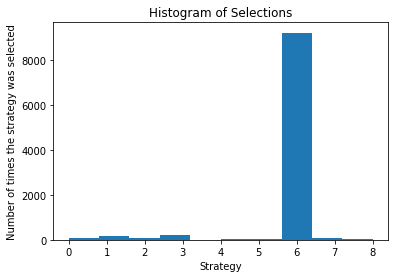

In [6]:
# Plotting the Histogram of Selections
plt.hist(strategies_selected_ts)
plt.title("Histogram of Selections")
plt.xlabel("Strategy")
plt.ylabel("Number of times the strategy was selected")
plt.show()

In [7]:
rewards_strategies = [0] * d 
for n in range(0, N):
    # Best Strategy
    for i in range(0, d):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs = max(rewards_strategies)

In [8]:
# Regret of Thompson Sampling
strategies_selected_ts = []
total_reward_ts = 0
total_reward_bs = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
rewards_strategies = [0] * d
regret = []
for n in range(0, N):
    # Thompson Sampling 
    strategy_ts = 0 
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1,
                                         numbers_of_rewards_0[i] + 1)
        if random_beta > max_random: 
            max_random = random_beta 
            strategy_ts = i
    reward_ts = X[n, strategy_ts] 
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1 
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1 
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts
    # Best Strategy
    for i in range(0, d):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs = max(rewards_strategies)
    # Regret
    regret.append(total_reward_bs - total_reward_ts)

In [9]:
# Regret of the Random Strategy
strategies_selected_rs = []
total_reward_rs = 0
total_reward_bs = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
rewards_strategies = [0] * d
regret = []
for n in range(0, N):
    # Random Strategy
    strategy_rs = random.randrange(d) 
    strategies_selected_rs.append(strategy_rs) 
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs 
    # Best Strategy
    for i in range(0, d):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i] 
    total_reward_bs = max(rewards_strategies)
    # Regret
    regret.append(total_reward_bs - total_reward_rs)

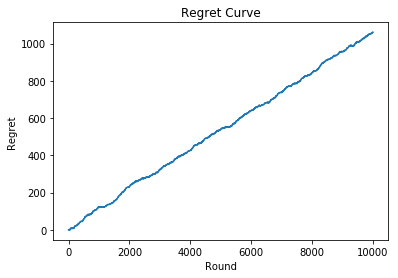

In [10]:
# Plotting the Regret Curve
plt.plot(regret)
plt.title("Regret Curve")
plt.xlabel("Round")
plt.ylabel("Regret")
plt.show()